<a href="https://colab.research.google.com/github/Frederick-Stein/Data-Science-Playground/blob/main/LogisticRegressionNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader

In [ ]:
# Load data of breast cancer from datasets
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target
n_samples, n_features = X.shape

print(f'Number of samples: {n_samples}')
print(f'Number of features: {n_features}')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

print(f'y_train shape: {y_train.shape}')
y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)
print(f'y_train shape: {y_train.shape}')

train_data = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_data, batch_size = 10, shuffle = True)
print(f"Train loader: {len(train_loader)}")

test_data = TensorDataset(X_test, y_test)
test_loader = DataLoader(test_data, batch_size = 32, shuffle = False)

Number of samples: 569
Number of features: 30
y_train shape: torch.Size([455])
y_train shape: torch.Size([455, 1])
Train loader: 46


In [ ]:
class LogisticRegression(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        self.linear = nn.Linear(in_features, out_features)

    def forward(self, x):
        return torch.sigmoid(self.linear(x))

model= LogisticRegression(n_features, 1)
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr = 0.01, momentum = 0.9)

train_error = []
test_error = []
epoch_count = []

epochs = 100

for epoch in range(epochs + 1):
    model.train()

    ### Use mini-batch

    # total_loss = 0
    # for X_batch, y_batch in train_loader:

    #     y_pred = model(X_batch)
    #     loss = criterion(y_pred, y_batch)

    #     optimizer.zero_grad()
    #     loss.backward()
    #     optimizer.step()

    #     total_loss += loss.item()

    # total_loss /= len(train_loader)


    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    total_loss = loss.item()



    model.eval()
    with torch.inference_mode():

        test_pred = model(X_test)
        test_loss = criterion(test_pred, y_test)
        accuracy = (test_pred.round() == y_test).sum() / len(y_test)
        precision = ((test_pred.round() == y_test) & (y_test == 1)).sum() / (test_pred.round() == 1).sum()
        recall = ((test_pred.round() == y_test) & (y_test == 1)).sum() / (y_test == 1).sum()
        f1_score = 2 * (precision * recall) / (precision + recall)

        train_error.append(total_loss)
        test_error.append(test_loss.item())
        epoch_count.append(epoch)

        if epoch % 10 == 0:
            print(f'Epoch: {epoch}, Train Loss: {loss.item():.4f}, Test Loss: {test_loss.item():.4f}, Precision: {precision.item(): .4f}, Recall: {recall.item(): .4f}, F1-score: {f1_score.item(): .4f}')

Epoch: 0, Train Loss: 0.5587, Test Loss: 0.5197, Precision:  0.8500, Recall:  0.9577, F1-score:  0.9007
Epoch: 10, Train Loss: 0.3183, Test Loss: 0.2635, Precision:  0.9452, Recall:  0.9718, F1-score:  0.9583
Epoch: 20, Train Loss: 0.2007, Test Loss: 0.1596, Precision:  0.9722, Recall:  0.9859, F1-score:  0.9790
Epoch: 30, Train Loss: 0.1565, Test Loss: 0.1254, Precision:  0.9859, Recall:  0.9859, F1-score:  0.9859
Epoch: 40, Train Loss: 0.1347, Test Loss: 0.1108, Precision:  0.9859, Recall:  0.9859, F1-score:  0.9859
Epoch: 50, Train Loss: 0.1229, Test Loss: 0.1028, Precision:  0.9859, Recall:  0.9859, F1-score:  0.9859
Epoch: 60, Train Loss: 0.1156, Test Loss: 0.0973, Precision:  0.9859, Recall:  0.9859, F1-score:  0.9859
Epoch: 70, Train Loss: 0.1102, Test Loss: 0.0932, Precision:  0.9859, Recall:  0.9859, F1-score:  0.9859
Epoch: 80, Train Loss: 0.1061, Test Loss: 0.0898, Precision:  0.9859, Recall:  0.9859, F1-score:  0.9859
Epoch: 90, Train Loss: 0.1027, Test Loss: 0.0871, Precis

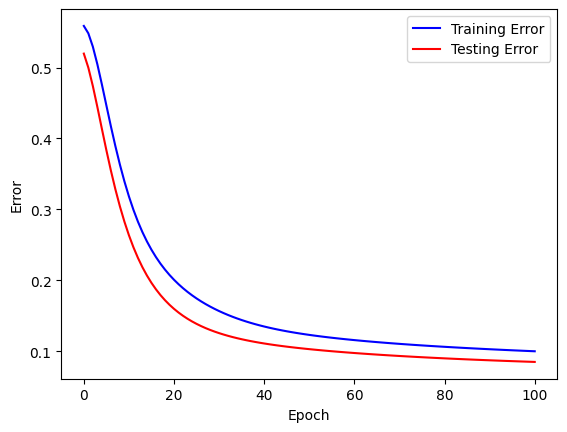

In [ ]:
plt.plot(epoch_count, train_error, c = 'blue', label = 'Training Error')
plt.plot(epoch_count, test_error, c = 'red', label = 'Testing Error')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()